## NFT ANALYSIS ##

### Importazione librerie e datasets

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

nft_ds = pd.read_csv('../datasets/nfts/nft_trades.csv', chunksize=100000)
nft_df = pd.concat(nft_ds)

nft_df.head()
nft_df.info()
nft_df.shape

/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_2306/2787522934.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  nft_df = pd.concat(nft_ds)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507678 entries, 0 to 507677
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              507678 non-null  object 
 1   transaction_hash  507678 non-null  object 
 2   num_items         507678 non-null  int64  
 3   seller            507678 non-null  object 
 4   buyer             507678 non-null  object 
 5   token_id          507678 non-null  object 
 6   avg_price         507678 non-null  float64
 7   currency          507678 non-null  object 
 8   usd_amount        507678 non-null  float64
 9   platform          507678 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 38.7+ MB


(507678, 10)

### Visualizzazione dei picchi per anni e mesi

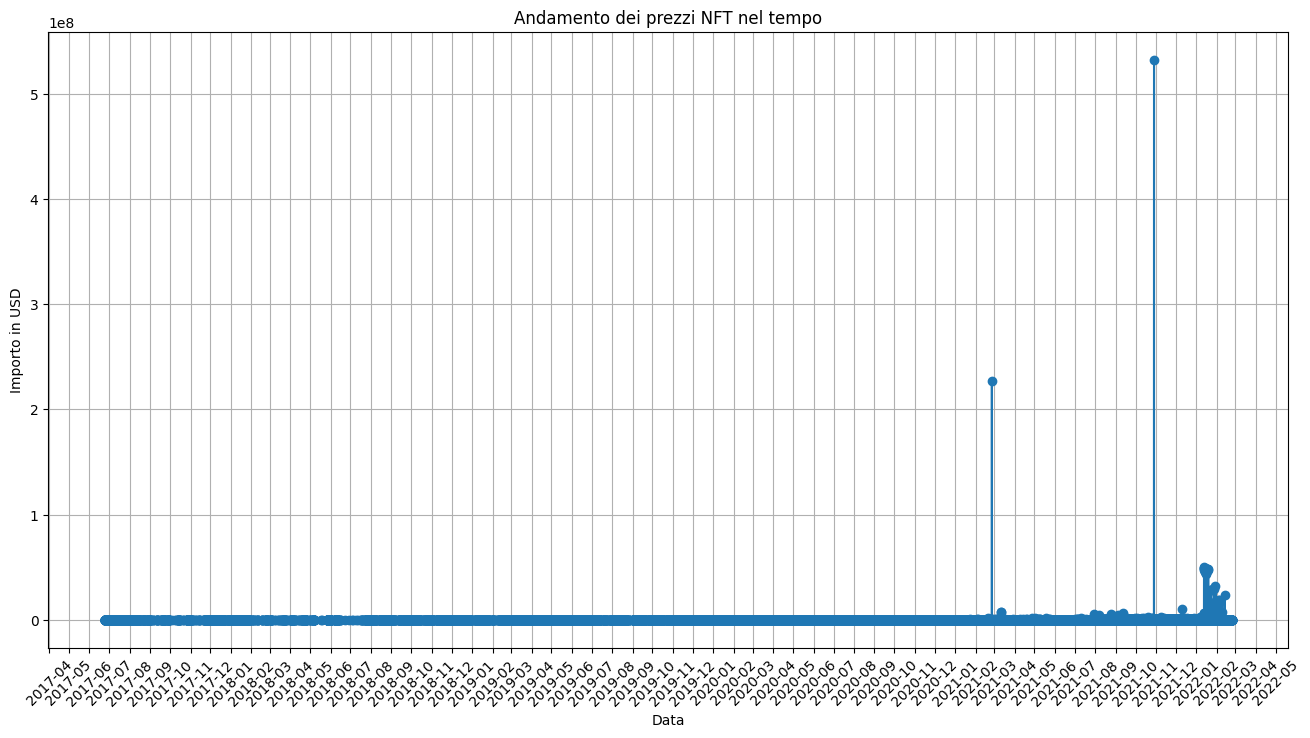

In [12]:
# Converti la colonna 'date' in formato datetime
nft_df['date'] = pd.to_datetime(nft_df['date'])

# Imposta 'date' come indice del DataFrame
nft_df.set_index('date', inplace=True)

plt.figure(figsize=(16, 8))  
plt.plot(nft_df.index, nft_df['usd_amount'], marker='o', linestyle='-')
plt.title('Andamento dei prezzi NFT nel tempo')
plt.xlabel('Data')
plt.ylabel('Importo in USD')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [13]:
# Verificare le colonne del DataFrame
# print(nft_df.columns)

### Visualizzazione dei picchi a partire dal 1° novembre 2020

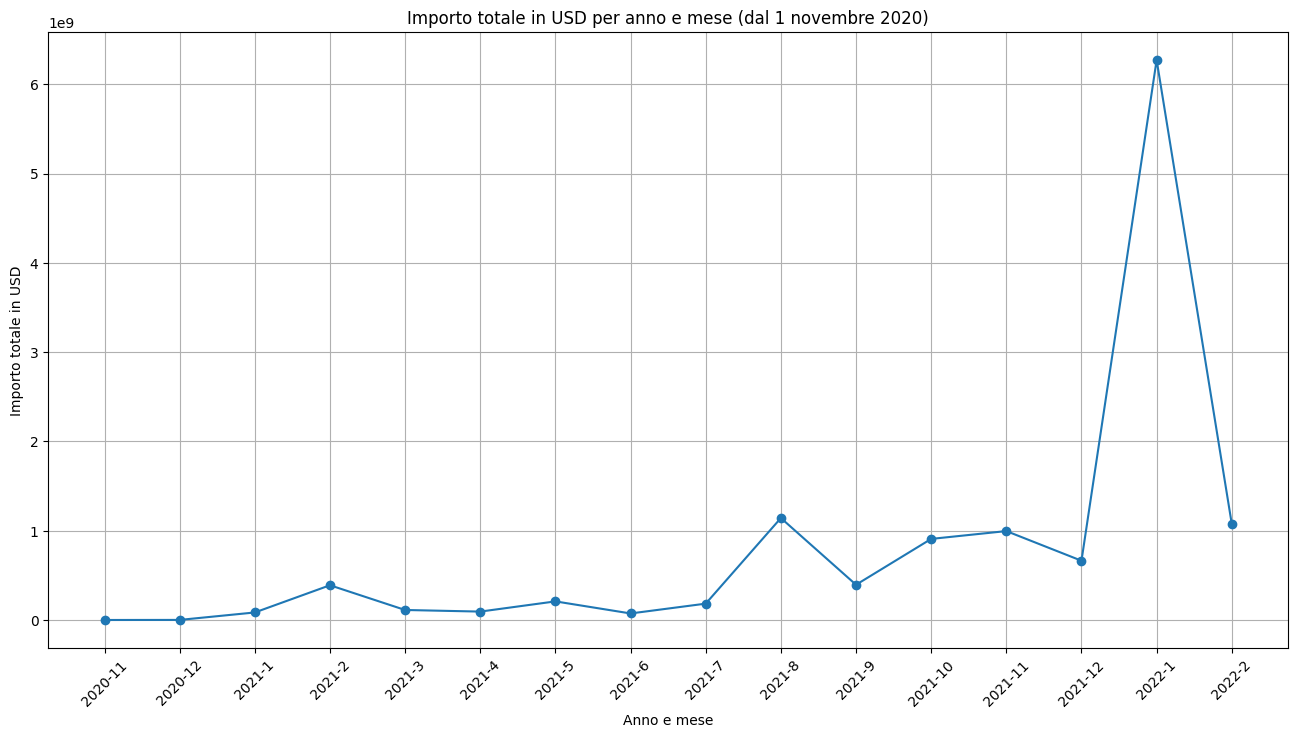

In [14]:
# Resetta l'indice per rendere 'date' una colonna standard
nft_df.reset_index(inplace=True)

# Converti la colonna 'date' in formato datetime
nft_df['date'] = pd.to_datetime(nft_df['date'])

# Filtra le transazioni dal 1 dicembre 2020 alla fine del dataset
nft_df_filtered = nft_df[nft_df['date'] >= pd.Timestamp('2020-11-01')]

# Calcola l'importo totale in USD per anno e mese
total_usd_per_year_month = nft_df_filtered.groupby([nft_df_filtered['date'].dt.year, nft_df_filtered['date'].dt.month])['usd_amount'].sum()

# Converte l'indice in formato stringa "anno-mese"
index_string = total_usd_per_year_month.index.map(lambda x: f"{x[0]}-{x[1]}")

plt.figure(figsize=(16, 8))
plt.plot(index_string, total_usd_per_year_month.values, marker='o', linestyle='-')
plt.title('Importo totale in USD per anno e mese (dal 1 novembre 2020)')
plt.xlabel('Anno e mese')
plt.ylabel('Importo totale in USD')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Salvataggio dataframe per confrontare picchi dei tweet e degli nft

In [15]:
# Percorso della cartella "datasets"
datasets_path = '../datasets/'

# Percorso della cartella "dataframes"
dataframes_path = '../dataframes'

# Creazione della cartella 'dataframes' se non esiste
os.makedirs(dataframes_path, exist_ok=True)

# Salvataggio del dataframe nft_df in un file CSV nella cartella 'dataframes'
nft_df_filtered.to_csv(os.path.join(dataframes_path, 'nft_df.csv'), index=False)